In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn  as sns

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Unnamed: 0,Age,EstimatedSalary,Target
0,40,-1.017692,-1.548776,0
1,240,0.415005,2.327385,1
2,196,-0.731153,0.271845,0
3,294,-0.253587,-0.374182,0
4,306,1.274623,1.886912,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 4 columns):
Unnamed: 0         280 non-null int64
Age                280 non-null float64
EstimatedSalary    280 non-null float64
Target             280 non-null int64
dtypes: float64(2), int64(2)
memory usage: 8.8 KB


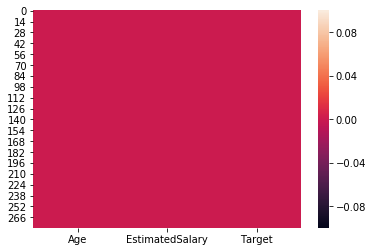

In [42]:
sns.heatmap(df.isnull())

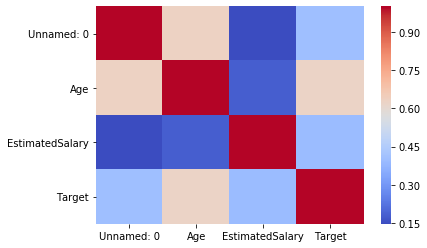

In [5]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_array = ss.fit_transform(df.drop('Target', axis=1))

In [7]:
X=pd.DataFrame(data=scaled_array,columns=df.columns[:-1])

In [8]:
y=df['Target']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [11]:
X_train.shape

(196, 3)

In [12]:
X_test.shape

(84, 3)

In [13]:
y_train.shape

(196,)

In [14]:
y_test.shape

(84,)

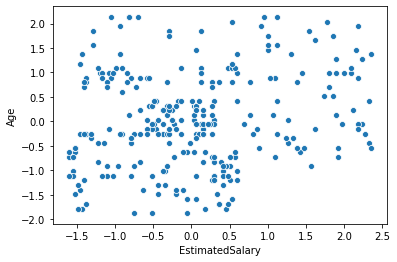

In [15]:
sns.scatterplot(x='EstimatedSalary',y='Age',data=df)

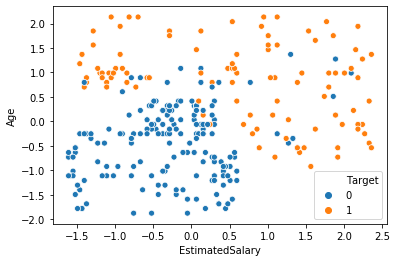

In [16]:
sns.scatterplot(x='EstimatedSalary',y='Age',data=df,hue='Target')

In [17]:
from sklearn.svm import SVC

In [18]:
classifier = SVC()

In [19]:
classifier.fit(X_train, y_train)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [20]:
ypred= classifier.predict(X_test)

In [21]:
ypred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [22]:
y_test

11     0
218    0
80     0
161    0
86     0
39     1
251    0
272    1
255    1
234    1
194    0
201    0
112    0
63     1
239    1
85     0
184    0
42     0
229    0
78     1
50     1
108    0
169    0
186    0
223    0
246    1
122    0
44     0
137    0
244    0
      ..
8      1
167    1
231    0
94     0
26     0
75     0
240    1
47     0
25     0
4      0
189    1
228    1
13     1
268    1
74     1
267    0
38     0
271    0
205    0
82     1
21     1
83     0
22     0
130    1
129    0
17     0
145    1
188    0
217    1
162    0
Name: Target, Length: 84, dtype: int64

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
cm= confusion_matrix(y_test,ypred)

In [24]:
cm

array([[49,  3],
       [ 4, 28]], dtype=int64)

In [25]:
y_test.value_counts()

0    52
1    32
Name: Target, dtype: int64

In [26]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        52
           1       0.90      0.88      0.89        32

    accuracy                           0.92        84
   macro avg       0.91      0.91      0.91        84
weighted avg       0.92      0.92      0.92        84

